# MLDL1 2022 Spring
## Assignment 2

# 0. Import Libraries & Datasets

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

In [ ]:
_path = '/content/drive/MyDrive/'
data_list = ['OnlineAd_X_train','OnlineAd_Y_train','OnlineAd_X_test']

In [ ]:
X_train_original = pd.read_csv(_path + '/' + data_list[0] + '.csv', low_memory = False, header=None)
y_train_original = pd.read_csv(_path + '/' + data_list[1] + '.csv', low_memory = False, header=None)

In [ ]:
# OnlineAD_X_train.csv
X_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 251 entries, 0 to 250
dtypes: float64(251)
memory usage: 2.8 MB


In [ ]:
# Check null values in X_train.csv
check_null = 0
for i in range(251):
  _null = X_train_original[i].isnull().sum()
  if _null != 0:
    print(i)
    check_null += _null
  else:
    check_null += _null
print(check_null)

0


In [ ]:
# OnlineAd_Y_train.csv
y_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1452 non-null   float64
 1   1       1452 non-null   float64
 2   2       1452 non-null   float64
dtypes: float64(3)
memory usage: 34.2 KB


In [ ]:
y_train_original.value_counts()

0    1    2  
1.0  0.0  0.0    822
0.0  0.0  1.0    353
     1.0  0.0    277
dtype: int64

In [ ]:
# Check the number and the ratio of each label
print("# of 'No Click':", int(y_train_original[:][0].sum()), "\n% of 'No Click':",round(round(int(y_train_original[:][0].sum())/len(y_train_original), 2)*100, 2), "%")
print(" ")
print("# of 'A':", int(y_train_original[:][1].sum()), "\n% of 'A':",round(int(y_train_original[:][1].sum())/len(y_train_original), 2)*100, "%")
print(" ")
print("# of 'B':", int(y_train_original[:][2].sum()), "\n% of 'B':",round(int(y_train_original[:][2].sum())/len(y_train_original), 2)*100, "%")

# of 'No Click': 822 
% of 'No Click': 57.0 %
 
# of 'A': 277 
% of 'A': 19.0 %
 
# of 'B': 353 
% of 'B': 24.0 %


In [ ]:
# transform Y_train into 1 column 
y_train_ = pd.DataFrame(np.zeros(len(y_train_original)))
for i in range(len(y_train_original)):
  if y_train_original.iloc[i,1] == 1:
    y_train_.iloc[i] = 1
  if y_train_original.iloc[i,2] == 1:
    y_train_.iloc[i] = 2
  if y_train_original.iloc[i,0] == 1:
    y_train_.iloc[i] = 0

In [ ]:
# Check whether the number of each label is the same as the original y_train
y_train_.value_counts(ascending=True)

1.0    277
2.0    353
0.0    822
dtype: int64

# 1. Training baseline models
 - (a) Train multiple models and report training result. 
  - Because of the imbalance of the ratio of each label, f1 score is a proper metric to evaluate the performance, which combines both recall and precision. 
    - Particularly, weighted-averaged f1 score is the average of each label considering the proportion for each label in the dataset.
  - Firstly, 4 baseline Models were constructed without any tuned hyperparameter and evaluated their performances.
  - With some options for the hyperparameters of each model, grid search cross-validation was conducted respectively to find the best parameter option. (The details are below)
  - Each model with the best parameter option was checked whether the cross-validation score of each optimized model had been improved. (f1 score)
    - Logistic regression: .547 -> .549
    - KNN: .563 ->.571
    - Random Forest: .580 -> .605
    - SVM: .564 -> .577 
  - After the hyperparameter tuning process, the performance of **the model based on Random Forest Algorithm** was highly improved, and showed the best f1 score among the 4 tuned models. 


In [ ]:
# Baseline model 1: Logistic Regression

model_logit_ = LogisticRegression(multi_class='ovr')
score_logit = cross_val_score(model_logit_, X_train_original, y_train_, scoring='f1_weighted', cv=5)
score_logit_ = round(sum(score_logit)/len(score_logit),3)
print(score_logit_)

0.547


In [ ]:
# Logistic Regression Model optimization
param_grid = [
    {'C': [0.5, 5, 10]}
]

optimal_params = GridSearchCV(
                    model_logit_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs =-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_original, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_logit = optimal_params.best_estimator_ 
print(es_logit) 

The optimal parameters: {'C': 0.5}
The best score: 0.549
LogisticRegression(C=0.5, multi_class='ovr')


In [ ]:
# Baseline model 2: K Nearest Neighbor Classifier (KNN)

model_knn_ = KNeighborsClassifier()
score_knn = cross_val_score(model_knn_, X_train_original, y_train_, scoring='f1_weighted', cv=5) 
score_knn_ = round(sum(score_knn)/len(score_knn),3)
print(score_knn_)

0.563


In [ ]:
# KNN Model optimization
param_grid = [
    {'n_neighbors': [3, 11, 55]}
]

optimal_params = GridSearchCV(
                    model_knn_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs=-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_original, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_knn = optimal_params.best_estimator_ 
print(es_knn) 

The optimal parameters: {'n_neighbors': 11}
The best score: 0.571
KNeighborsClassifier(n_neighbors=11)


In [ ]:
# Baseline model 3: Random Forest

model_rf_ = RandomForestClassifier(random_state=25212)
score_rf = cross_val_score(model_rf_, X_train_original, y_train_, scoring='f1_weighted', cv=5)
score_rf_ = round(sum(score_rf)/len(score_rf),3)
print(score_rf_)

0.58


In [ ]:
# Random Forest Model optimization
param_grid = [
    {'n_estimators': [20, 150],
     'min_samples_split': [8, 16],
     'min_samples_leaf': [8, 12],
     'max_depth':[4, 8]}
]

optimal_params = GridSearchCV(
                    model_rf_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs=-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_original, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_rf = optimal_params.best_estimator_ 
print(es_rf) 

The optimal parameters: {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 20}
The best score: 0.605
RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=20, random_state=25212)


In [ ]:
# Baseline model 4: Support Vector Machine with RBF kernel (SVM)

model_svm_ = SVC(kernel='rbf')
score_svm = cross_val_score(model_svm_, X_train_original, y_train_, scoring='f1_weighted', cv=5)
score_svm_=round(sum(score_svm)/len(score_svm),3)
print(score_svm_)

0.564


In [ ]:
# SVM Model optimization
param_grid = [
    {'C': [1, 10, 100],
    'gamma': [1, 0,1, 0.01]}
]

optimal_params = GridSearchCV(
                    model_svm_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs=-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_original, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_svm = optimal_params.best_estimator_ 
print(es_svm) 

The optimal parameters: {'C': 10, 'gamma': 0.01}
The best score: 0.577
SVC(C=10, gamma=0.01)


 - (b) Decide whether dimension reduction (or feature selection) is needed.
  - Dimension reduction with PCA
    - Scree Plot from PCA(Principle Component Analysis) shows how many principle components can explain the total variance in the whole dataset. 
    - If several principle components(PCs) accounts for the most of variance, dimension reduction would be effective way to improve the base models in 1.(a).
    - The Explained Variance Ratio of the first 3 PCs, however, only accounted for 47.6% of the total variance. Even the firt 10 PCs only explained 51.4%, **which means the dimension reduction was not that effective on this task.** (The details are below)
    - The performance of the best model chosen in 1.(a) with 10 PCs got worse. (.605 -> .590)
    - After the hyperparameter tuning process, the performance was not improved.

  - Feature Selection with Feature importance 
    - Since **the high dimensional dataset is still not desirable,** feature selection based on feature importances can be an alternative. 
    - The most important 10 features were selected by the best model in 1. (a).
    - The f1 score of the model with selected features, however, also got worse. (.605 -> .590)
    - After tuning the hyperparameters, the performance was slightly improved, but did not outperformed the model with complete features. (.594 < .605)
    - **There may be the best subset of the features which works better than the model with the full-featured training dataset. However, the subset couldn't be figured out by the two methods above.**

In [ ]:
# Conduct PCA on X_train
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train_original)

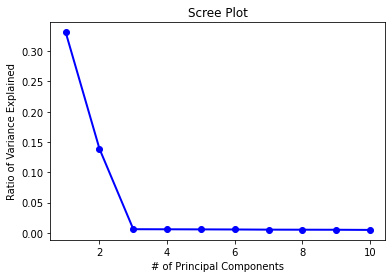

In [ ]:
# Plot the scree plot
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('# of Principal Components')
plt.ylabel('Ratio of Variance Explained')
plt.show()

- The first 3 principal components explains 47.6% of the total variance. 
  - The first principal component explains 33.1% of the total variation in the dataset.
  - The second principal component explains 13.9% of the total variation.
  - The third principal component explains 6.1% of the total variation.
  - The other principal ccmponents only explains only less than 6% of the total variantion.

In [ ]:
# Calculate explained variance ratio of the PCs
evr_list = pca.explained_variance_ratio_
print(evr_list)
print(" ")
print("EVR of the first 3 PCs:", round(round(sum(evr_list[0:3]),3)*100,2),"%")
print("EVR of the first 10 PCs:", round(round(sum(evr_list[0:100]),3)*100,2),"%")

[0.3311108  0.13866552 0.00607905 0.00594526 0.00578738 0.00562698
 0.00534612 0.00524957 0.00516952 0.00490565]
 
EVR of the first 3 PCs: 47.6 %
EVR of the first 10 PCs: 51.4 %


In [ ]:
# Check whether reduced dimension improves the performance
X_train_reduced = pca.fit_transform(X_train_original)

model_rf_best = RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=20, random_state=25212)
score_rf_Xreduced = cross_val_score(model_rf_best, X_train_reduced, y_train_, scoring='f1_weighted', cv=5)
score_rf_Xreduced_ = round(sum(score_rf_Xreduced)/len(score_rf_Xreduced),3)
print(score_rf_Xreduced_)

0.59


In [ ]:
# Dimension reduced model optimization
param_grid = [
    {'n_estimators': [20, 150],
     'min_samples_split': [8, 16],
     'min_samples_leaf': [8, 12],
     'max_depth':[4, 8]}
]

optimal_params = GridSearchCV(
                    model_rf_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs=-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_reduced, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_rf = optimal_params.best_estimator_ 
print(es_rf) 

The optimal parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 20}
The best score: 0.59
RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=20, random_state=25212)


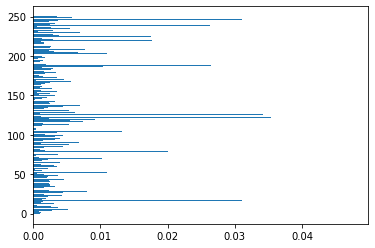

In [ ]:
# Feature Importance with the best model based on Random Forest
model_rf_best = RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=20, random_state=25212)
model_rf_best.fit(X_train_original, y_train_)

importances = model_rf_best.feature_importances_

n_feature = X_train_original.shape[1]
index=np.arange(n_feature)
plt.barh(index, importances, align='center')
plt.show()

In [ ]:
# Refit model with top 10 selected features and check the performance
select_idx = np.argpartition(importances, -10)[10:]
X_train_selected = X_train_original[select_idx]
score_rf_Xselected = cross_val_score(model_rf_best, X_train_selected, y_train_, scoring='f1_weighted', cv=5)
score_rf_Xselected_ = round(sum(score_rf_Xreduced)/len(score_rf_Xreduced),3)
print(score_rf_Xselected_)

0.59


In [ ]:
# Feature selected model optimization
param_grid = [
    {'n_estimators': [20, 150],
     'min_samples_split': [8, 16],
     'min_samples_leaf': [8, 12],
     'max_depth':[4, 8]}
]

optimal_params = GridSearchCV(
                    model_rf_,  
                    param_grid = param_grid, 
                    cv=5,
                    n_jobs=-1,     
                    scoring = 'f1_weighted') 

optimal_params.fit(X_train_selected, y_train_)
print("The optimal parameters:", optimal_params.best_params_)
print("The best score:", round(optimal_params.best_score_,3))
es_rf = optimal_params.best_estimator_ 
print(es_rf) 

The optimal parameters: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 20}
The best score: 0.594
RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=20, random_state=25212)


# 2. The estimated test performance of the best model 

 - (a) Report the estimated test performance for the best model and provide a reason for the choice of a model
  - **The Random Forest Algorithm model with the complete features** was selected, because its cross-validation f1 score was higher than any other models considered in 1. (a). and (b). 
  - In order to estimate the test performance of the best model, the OnlineAd_X_train and OnlineAd_Y_train were split into train and validation set (7:3).
  - **As the estimated test performance, the f1 score (weighted-averaged) of the best model with the validation set is .551**.
      - The difference between performance in 1.(a). (.605) and 2.(a). (.551) may be resulted from the difference between cross-validation and validation set approach. That is, the size of the train set was diminished in 2.(a). (validation set approach), and the score of the model may be decreased.

In [ ]:
# Split dataset
_df = pd.concat([X_train_original, y_train_],axis=1)
train, val = np.split(_df.sample(frac=1, random_state=25212), [int(0.7*len(_df))])
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_val = val.iloc[:, :-1]
y_val = val.iloc[:, -1]
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_val:",X_val.shape)
print("y_val:",y_val.shape)

X_train: (1016, 251)
y_train: (1016,)
X_val: (436, 251)
y_val: (436,)


In [ ]:
# Estimating the test performance with the f1 score of the validation set
model_rf_best = RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=20, random_state=25212)
model_rf_best.fit(X_train, y_train)
y_hat = model_rf_best.predict(X_val)
print(metrics.classification_report(y_true = y_val, y_pred=y_hat, digits=3))

              precision    recall  f1-score   support

         0.0      0.631     0.871     0.732       241
         1.0      0.179     0.083     0.114        84
         2.0      0.672     0.387     0.491       111

    accuracy                          0.596       436
   macro avg      0.494     0.447     0.446       436
weighted avg      0.554     0.596     0.551       436



 - (b) Predict on the provided test dataset, and save those predictions as a CSV filed.

In [ ]:
X_test = pd.read_csv(_path + '/' + data_list[2] + '.csv', low_memory = False, header=None)

In [ ]:
y_pred = model_rf_best.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
dummy_ = pd.get_dummies(y_pred_df[0])
dummy_.to_csv('2022-25212_pred.csv', header=False, index=False)

- References
  - logistic regression for multiclass: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html, https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gdpresent&logNo=221716396894
  -KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
  - Random Forest: https://partrita.github.io/posts/random-forest-python/, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  - Metrics: https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
  - Dimension Reduction: https://www.statology.org/scree-plot-python/
  - Feature Importance: https://woolulu.tistory.com/28